In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
temp_data = [20.7, 17.9, 18.8, 14.6, 15.8]

df = pd.DataFrame(temp_data, columns=['temperature'])

df

,temperature
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


In [3]:
df_tmp = df.rolling(window = 3).mean()
df_tmp_shift = df.rolling(window = 3).mean().shift(periods = 1)
df_tmp = pd.concat([df_tmp_shift, df_tmp, df], axis = 1)

df_tmp

,temperature,temperature,temperature
0,NaN,NaN,20.7
1,NaN,NaN,17.9
2,NaN,19.133333,18.8
3,19.133333,17.100000,14.6
4,17.100000,16.400000,15.8


In [28]:
df_tmp = pd.concat([df.shift(1), df], axis = 1)
df_tmp.columns = ['t-1', 't+1']

df_tmp

,t-1,t+1
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8


In [29]:
'''
A difficulty with the sliding window approach is how large to make the window for your problem.
Additionally, why stop with a linear window? 
Perhaps you need a lag value from last week, last month, and last year. Again, this comes down to the specific domain.

In the case of the temperature dataset, a lag value from the same day in the previous year or previous few years may be useful.
'''

df_tmp = pd.concat([df.shift(3), df.shift(2), df.shift(1), df], axis=1)
df_tmp.columns = ['t-3', 't-2', 't-1', 't+1']

df_tmp

,t-3,t-2,t-1,t+1
0,NaN,NaN,NaN,20.7
1,NaN,NaN,20.7,17.9
2,NaN,20.7,17.9,18.8
3,20.7,17.9,18.8,14.6
4,17.9,18.8,14.6,15.8


In [30]:
'''
A step beyond adding raw lagged values is to add a summary of the values at previous time steps.

We can calculate summary statistics across the values in the sliding window and include these as features in our dataset. 
Perhaps the most useful is the mean of the previous few values, also called the rolling mean.

For example, we can calculate the mean of the previous two values and use that to predict the next value. 
For the temperature data, we would have to wait 3 time steps before we had 2 values to take the average of before we could use that value to predict a 3rd value.
'''

df_shift = df.shift(1)

window = df_shift.rolling(window = 2)
means = window.mean()
df_tmp = pd.concat([means, df], axis = 1)
df_tmp.columns = ['mean(t-2, t-1)', 't+1']

df_tmp

,"mean(t-2, t-1)",t+1
0,NaN,20.7
1,NaN,17.9
2,19.30,18.8
3,18.35,14.6
4,16.70,15.8


In [31]:
'''
Below is another example that shows a window width of 3 and a dataset comprised of more summary statistics, 
specifically the minimum, mean, and maximum value in the window.

In this case, the window width of 3 means we must shift the series forward by 2 time steps. 
This makes the first two rows NaN. 
Next, we need to calculate the window statistics with 3 values per window. 
It takes 3 rows before we even have enough data from the series in the window to start calculating statistics.
'''
window_size = 3

df_shift = df.shift(window_size - 1)
print(df_shift)
print('---------------------------')

window = df_shift.rolling(window = window_size)
df_tmp = pd.concat([window.min(), window.mean(), window.max(), df], axis = 1)
df_tmp.columns = ['min', 'mean', 'max', 't+1']

df_tmp

   temperature
0          NaN
1          NaN
2         20.7
3         17.9
4         18.8
---------------------------


,min,mean,max,t+1
0,NaN,NaN,NaN,20.7
1,NaN,NaN,NaN,17.9
2,NaN,NaN,NaN,18.8
3,NaN,NaN,NaN,14.6
4,17.9,19.133333,20.7,15.8


In [32]:
'''
Another type of window that may be useful includes all previous data in the series.

This is called an expanding window and can help with keeping track of the bounds of observable data. 
Like the rolling() function on DataFrame, 
Pandas provides an expanding() function that collects sets of all prior values for each time step.
'''
window = df.expanding()
df_tmp = pd.concat([window.min(), window.mean(), window.max(), df.shift(-1)], axis = 1)
df_tmp.columns = ['min', 'mean', 'max', 't+1']

df_tmp

,min,mean,max,t+1
0,20.7,20.700000,20.7,17.9
1,17.9,19.300000,20.7,18.8
2,17.9,19.133333,20.7,14.6
3,14.6,18.000000,20.7,15.8
4,14.6,17.560000,20.7,NaN


In [4]:
df = pd.read_csv('./sl40_data.csv', index_col = 'data_time')

df.index = pd.to_datetime(df.index, format = '%Y-%m-%d %H:%M:%S:%f')

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1042 entries, 2019-02-25 06:36:00 to 2019-02-27 18:04:00
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   site_id    1042 non-null   int64  
 1   device_id  1042 non-null   int64  
 2   out_power  1042 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 32.6 KB


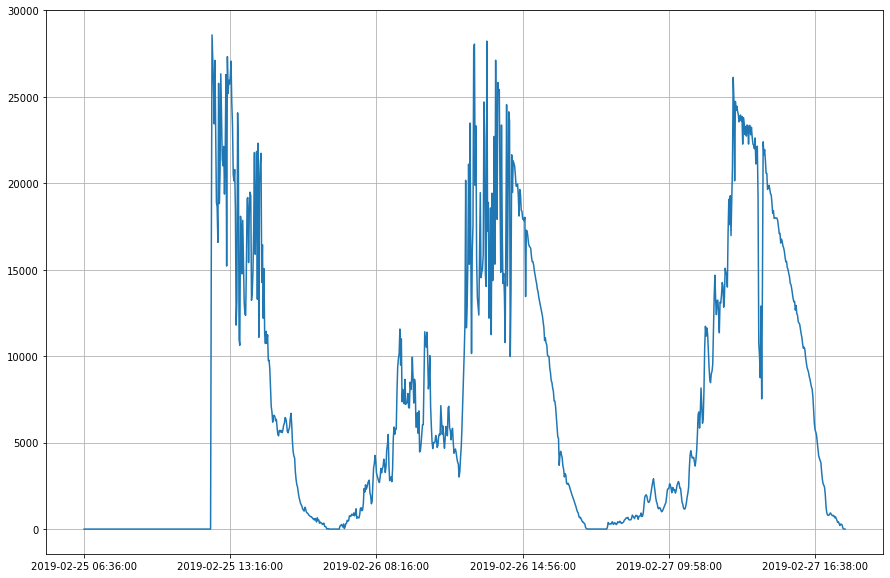

In [34]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.xticks(np.arange(0, len(df), step = 200))
plt.plot(df.index.astype(str), df['out_power'])
plt.show()

In [6]:
df_roll = pd.DataFrame()

for idx, window in enumerate(df.rolling(window = 3)):
	# df_roll = df_roll.append(window)
	print(window)
	print('----------------')
	if idx == 4:
		break

df_roll = df_roll.reset_index()

df_roll

site_id       77.0
device_id    267.0
out_power      0.0
dtype: float64
----------------
site_id      154.0
device_id    534.0
out_power      0.0
dtype: float64
----------------
site_id      231.0
device_id    801.0
out_power      0.0
dtype: float64
----------------
site_id      231.0
device_id    801.0
out_power      0.0
dtype: float64
----------------
site_id      231.0
device_id    801.0
out_power      0.0
dtype: float64
----------------


,index


In [ ]:
def fill_out_missing_data(src_path, dst_path):
	return

def create_window_data(src_path, dst_path, window_size):
	chunk_list = pd.read_csv(	src_path, 
								index_col = 'data_time', 
								chunksize = 5)

	for chunk in chunk_list:
		print(chunk)

